## CPC251 Machine Learning and Computational Intelligence

## Project

## Group11_QSAR

### Sumission Date : 4 July 2021

### Lecturer : Dr. Mohd Halim Mohd Noor, Dr. Mohd Nadhir Ab Wahab
     

### Group members :
### 1. Kirtiniroopa Shankar (146127)
### 2. Pamela Rabecca Saraswathy (146958)
### 3. Siti Zainab Binti Sahardin (147672)
### 4. Rafia  Hossain (149684)

## Installing Libraries

#### Installing mlxtend library

In [1]:
pip install mlxtend  

Note: you may need to restart the kernel to use updated packages.


#### Installing scikit-fuzzy to import skfuzzy

In [2]:
pip install -U scikit-fuzzy

Requirement already up-to-date: scikit-fuzzy in c:\users\user\anaconda3\lib\site-packages (0.4.2)
Note: you may need to restart the kernel to use updated packages.


## Loading Data

#### Import the libraries needed

In [49]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Importing necessary libraries for Feature Selection

In [50]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#### Import the dataset (QSAR biodegradation dataset by reading from the file "biodeg.csv"):

In [77]:
biodeg = pd.read_csv('biodeg.csv', sep=';')

#printing details of data
print("Keys : ", biodeg.keys())
print("\n")
print("Dataset Shape : ",biodeg.shape)
biodeg.head()

Keys :  Index(['SpMax_L', 'J_Dz(e)', 'nHM', 'F01[N-N]', 'F04[C-N]', 'NssssC', 'nCb-',
       'C%', 'nCp', 'nO', 'F03[C-N]', 'SdssC', 'HyWi_B(m)', 'LOC', 'SM6_L',
       'F03[C-O]', 'Me', 'Mi', 'nN-N', 'nArNO2', 'nCRX3', 'SpPosA_B(p)',
       'nCIR', 'B01[C-Br]', 'B03[C-Cl]', 'N-073', 'SpMax_A', 'Psi_i_1d',
       'B04[C-Br]', 'SdO', 'TI2_L', 'nCrt', 'C-026', 'F02[C-N]', 'nHDon',
       'SpMax_B(m)', 'Psi_i_A', 'nN', 'SM6_B(m)', 'nArCOOR', 'nX',
       'experimental_class'],
      dtype='object')


Dataset Shape :  (1055, 42)


,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental_class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,RB


#### Setting experimental_class as our target feature in y and the features to be selected from in x

In [78]:
#assigning 'experimental_class' column data as target to variable y
y = biodeg['experimental_class']

#Assigning all columns accepts columns with string data type and 'experimental_class' column to x
x = biodeg.drop(columns = 'experimental_class')

#print x shape
print(x.shape)
x.head()

(1055, 41)


,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,0,2.949,1.591,0,7.253,0,0
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,0,3.315,1.967,0,7.257,0,0
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,0,1,3.076,2.417,0,7.601,0,0
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,0,1,3.046,5.000,0,6.690,0,0
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,0,3.351,2.405,0,8.003,0,0


## Feature Selection using Wrapper Method with forward selection technique

#### For feature selection we will use RandomForestClassifier() function to estimate
#### Only accuracy score used - for classifier
#### For forward selection forward=true and floating=false
#### K-fold Cross Validation is applied through the cv argument

In [79]:
#SequentialFeatureSelector function
sfs = SFS(RandomForestClassifier(),
           k_features=(1,41),
           forward=True,
           floating=False, 
           verbose = 2,
           scoring = 'accuracy',
           n_jobs = -1,
           cv = 4)

In [54]:
sfs.fit(x,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:   17.7s finished

[2021-07-04 19:34:24] Features: 1/41 -- score: 0.7213460652148865[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   20.6s finished

[2021-07-04 19:34:45] Features: 2/41 -- score: 0.7933985770250029[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:   15.8s finished

[2021-07-04 19:35:01] Features: 3/41 -- score: 0.8303267945615854[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:   17.3s finished

[2021-07-04 19:35:18] Features: 4/41 -- score: 0.8492805910819219[Parallel(n_jobs=-1)]: U

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s finished

[2021-07-04 19:40:39] Features: 37/41 -- score: 0.8568743518838576[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.7s finished

[2021-07-04 19:40:41] Features: 38/41 -- score: 0.8559381841225947[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.4s finished

[2021-07-04 19:40:43] Features: 39/41 -- score: 0.8578177209355916[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.2s finished

[2021-07-04 19:40:44] Features: 40/41 -- score: 0.8549876137803895[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.1s finished

[2021-07-04 19:40:45] Features: 41/41 -- score: 0.8464540845719553

SequentialFeatureSelector(cv=4, estimator=RandomForestClassifier(),
                          k_features=(1, 41), n_jobs=-1, scoring='accuracy',
                          verbose=2)

#### Create a dataframe for the SFS results:

In [56]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(35,)","[0.7575757575757576, 0.6704545454545454, 0.715...",0.721346,"(SpMax_B(m),)",0.0527772,0.0329244,0.0190089
2,"(0, 35)","[0.7954545454545454, 0.75, 0.7992424242424242,...",0.793399,"(SpMax_L, SpMax_B(m))",0.0452113,0.0282045,0.0162839
3,"(0, 15, 35)","[0.8333333333333334, 0.8257575757575758, 0.837...",0.830327,"(SpMax_L, F03[C-O], SpMax_B(m))",0.00815208,0.00508557,0.00293616
4,"(0, 13, 15, 35)","[0.8787878787878788, 0.8295454545454546, 0.848...",0.849281,"(SpMax_L, LOC, F03[C-O], SpMax_B(m))",0.0293543,0.0183123,0.0105726
5,"(0, 13, 15, 35, 37)","[0.875, 0.8560606060606061, 0.8371212121212122...",0.859726,"(SpMax_L, LOC, F03[C-O], SpMax_B(m), nN)",0.0237575,0.0148208,0.00855681
6,"(0, 13, 15, 35, 37, 40)","[0.8598484848484849, 0.8636363636363636, 0.848...",0.861624,"(SpMax_L, LOC, F03[C-O], SpMax_B(m), nN, nX)",0.0149144,0.00930414,0.00537175
7,"(0, 13, 15, 22, 35, 37, 40)","[0.875, 0.8598484848484849, 0.8560606060606061...",0.867309,"(SpMax_L, LOC, F03[C-O], nCIR, SpMax_B(m), nN,...",0.0152648,0.00952278,0.00549798
8,"(0, 13, 15, 20, 22, 35, 37, 40)","[0.875, 0.875, 0.8484848484848485, 0.874524714...",0.868252,"(SpMax_L, LOC, F03[C-O], nCRX3, nCIR, SpMax_B(...",0.0182971,0.0114144,0.00659013
9,"(0, 13, 15, 20, 22, 28, 35, 37, 40)","[0.8787878787878788, 0.8712121212121212, 0.844...",0.867305,"(SpMax_L, LOC, F03[C-O], nCRX3, nCIR, B04[C-Br...",0.0213619,0.0133264,0.00769399
10,"(0, 13, 15, 20, 22, 25, 28, 35, 37, 40)","[0.875, 0.8674242424242424, 0.8522727272727273...",0.869207,"(SpMax_L, LOC, F03[C-O], nCRX3, nCIR, N-073, B...",0.0177507,0.0110735,0.0063933


In [57]:
#prints features with highest scores
print("Highest Feature Score: ", sfs.k_score_)

Highest Feature Score:  0.877725688443369


In [58]:
#Lists the combination of features' index with the highest score
print("Feature Index: ", sfs.k_feature_idx_)

Feature Index:  (0, 1, 2, 3, 5, 7, 8, 10, 13, 15, 16, 17, 20, 22, 23, 24, 25, 28, 30, 31, 33, 35, 36, 37, 39, 40)


In [59]:
#Lists the combination of features with the highest score
print("Feature Names: ", sfs.k_feature_names_)

Feature Names:  ('SpMax_L', 'J_Dz(e)', 'nHM', 'F01[N-N]', 'NssssC', 'C%', 'nCp', 'F03[C-N]', 'LOC', 'F03[C-O]', 'Me', 'Mi', 'nCRX3', 'nCIR', 'B01[C-Br]', 'B03[C-Cl]', 'N-073', 'B04[C-Br]', 'TI2_L', 'nCrt', 'F02[C-N]', 'SpMax_B(m)', 'Psi_i_A', 'nN', 'nArCOOR', 'nX')


### Features selected: (0, 1, 2, 3, 5, 7, 8, 10, 13, 15, 16, 17, 20, 22, 23, 24, 25, 28, 30, 31, 33, 35, 36, 37, 39, 40)

### 'SpMax_L', 'J_Dz(e)', 'nHM', 'F01[N-N]', 'NssssC', 'C%', 'nCp', 'F03[C-N]', 'LOC', 'F03[C-O]', 'Me', 'Mi', 'nCRX3', 'nCIR', 'B01[C-Br]', 'B03[C-Cl]', 'N-073', 'B04[C-Br]', 'TI2_L', 'nCrt', 'F02[C-N]', 'SpMax_B(m)', 'Psi_i_A', 'nN', 'nArCOOR', 'nX'

#### Ensuring the best suitable number of features i.e. k-value:

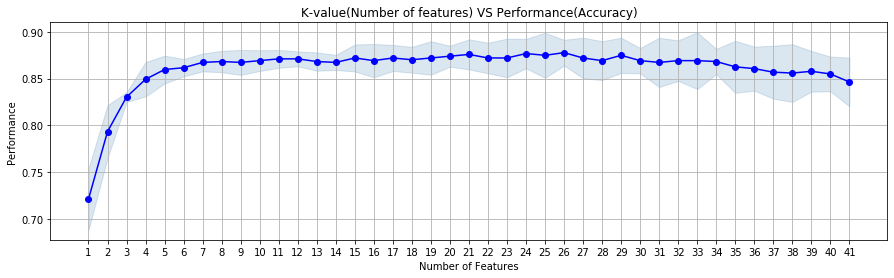

In [60]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

checkkvalue = plot_sfs(sfs.get_metric_dict(), kind='std_dev',figsize=(15, 4))
plt.title('K-value(Number of features) VS Performance(Accuracy)')

plt.grid()
plt.show()

## Predictive model using Support Vector Machine algorithm.

#### Import libraries for SVM model

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#### Assigning the best features to variable X

In [88]:
X = biodeg[['SpMax_L', 'J_Dz(e)', 'nHM', 'F01[N-N]', 'NssssC', 'C%', 'nCp', 'F03[C-N]', 'LOC', 'F03[C-O]', 
            'Me', 'Mi', 'nCRX3', 'nCIR', 'B01[C-Br]', 'B03[C-Cl]', 'N-073', 'B04[C-Br]', 'TI2_L', 'nCrt', 
            'F02[C-N]', 'SpMax_B(m)', 'Psi_i_A', 'nN', 'nArCOOR', 'nX']]

#### Splitting dataset to test and train data

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0) 

print("Training dataset shape: ", X_train.shape) 
print("Testing dataset shape: ", X_test.shape)

Training dataset shape:  (844, 26)
Testing dataset shape:  (211, 26)


### 1. Linear Kernel

#### For our classification, we use  Support Vector Classifier (_SVC_) class, taking kernel type i.e. linear as a parameter.
#### The _fit_ method from the _SVC_ class takes the training data as argument to train SVM algorithm on the training data.

In [90]:
svc1 = SVC(kernel='linear')
svc1.fit(X_train, y_train)

SVC(kernel='linear')

#### We use the predict method from the SVR class for predictions with the test and train data as the parameters.

In [91]:
y_predTest1 = svc1.predict(X_test)
y_predTrain1 = svc1.predict(X_train)

#### A graph of experimental class against predicted experimental class is plotted.

------------------------Linear Kernel-----------------------


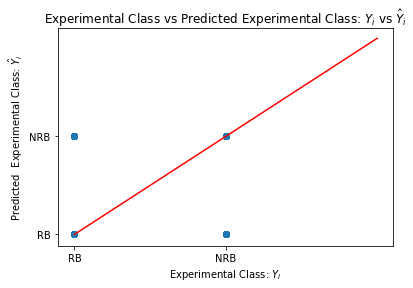

In [134]:
plt.scatter(y_test, y_predTest1)
plt.xlabel('Experimental Class: $Y_i$')
plt.ylabel('Predicted  Experimental Class: $\hat{Y}_i$')
plt.title('Experimental Class vs Predicted Experimental Class: $Y_i$ vs $\hat{Y}_i$')

# plot a line, a perfect prediction would all fall on this line
x = np.linspace(0, 2)
y = x
plt.plot(x, y, 'r')
print("------------------------Linear Kernel-----------------------")

#### To evaluate our algorithm, we use accuracy_score, confusion_matrix and classification_report to obtain the values of the respective metrics. The classification_report lists precision score, recall score and f1-score for both classes, macro average and weighted average.

##### Testing Data

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Testing Data\n---------------")
print("Accuracy Score: ", accuracy_score(y_test, y_predTest1))

print("\nConfusion Matrix:\n ", confusion_matrix(y_test, y_predTest1))

print("\n\nClassification Report:\n")
print(classification_report(y_test, y_predTest1))

Testing Data
---------------
Accuracy Score:  0.8483412322274881

Confusion Matrix:
  [[134  18]
 [ 14  45]]


Classification Report:

              precision    recall  f1-score   support

         NRB       0.91      0.88      0.89       152
          RB       0.71      0.76      0.74        59

    accuracy                           0.85       211
   macro avg       0.81      0.82      0.82       211
weighted avg       0.85      0.85      0.85       211



##### Training Data

In [94]:
print("Training Data\n---------------")
print("Accuracy Score: ", accuracy_score(y_train, y_predTrain1))

print("\nConfusion Matrix:\n ", confusion_matrix(y_train, y_predTrain1))

print("\n\nClassification Report:\n")
print(classification_report(y_train, y_predTrain1))

Training Data
---------------
Accuracy Score:  0.8755924170616114

Confusion Matrix:
  [[504  43]
 [ 62 235]]


Classification Report:

              precision    recall  f1-score   support

         NRB       0.89      0.92      0.91       547
          RB       0.85      0.79      0.82       297

    accuracy                           0.88       844
   macro avg       0.87      0.86      0.86       844
weighted avg       0.87      0.88      0.87       844



### 2. Polynomial Kernel

#### We take kernel type _poly_ i.e. polynomial and its degree as the parameters for SVC class.
#### Like before for linear kernel, the _fit_ method from the _SVC_ class takes the training data as argument to train SVM algorithm.

In [95]:
svc2 = SVC(kernel='poly', degree=8)
svc2.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

#### We use the predict method from the SVC class for predictions with the test and train data as the parameters.

In [96]:
y_predTest2 = svc2.predict(X_test)
y_predTrain2 = svc2.predict(X_train)

#### A graph of experimental class against predicted experimental class is plotted.

------------------------Polynomial Kernel-----------------------


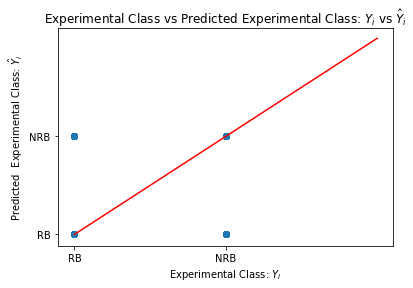

In [135]:
plt.scatter(y_test, y_predTest2)
plt.xlabel('Experimental Class: $Y_i$')
plt.ylabel('Predicted  Experimental Class: $\hat{Y}_i$')
plt.title('Experimental Class vs Predicted Experimental Class: $Y_i$ vs $\hat{Y}_i$')

# plot a line, a perfect prediction would all fall on this line
x = np.linspace(0, 2)
y = x
plt.plot(x, y, 'r')
print("------------------------Polynomial Kernel-----------------------")

#### To evaluate our algorithm, we use accuracy_score, confusion_matrix and classification_report to obtain the values of the respective metrics. The classification_report lists precision score, recall score and f1-score for both classes, macro average and weighted average.

##### Testing Data

In [98]:
print("Testing Data\n---------------")
print("Accuracy Score: ", accuracy_score(y_test, y_predTest2))

print("\nConfusion Matrix:\n ", confusion_matrix(y_test, y_predTest2))

print("\n\nClassification Report:\n")
print(classification_report(y_test, y_predTest2))


Testing Data
---------------
Accuracy Score:  0.7630331753554502

Confusion Matrix:
  [[140  12]
 [ 38  21]]


Classification Report:

              precision    recall  f1-score   support

         NRB       0.79      0.92      0.85       152
          RB       0.64      0.36      0.46        59

    accuracy                           0.76       211
   macro avg       0.71      0.64      0.65       211
weighted avg       0.74      0.76      0.74       211



##### Training Data

In [99]:
print("Training Data\n---------------")
print("Accuracy Score: ", accuracy_score(y_train, y_predTrain2))

print("\nConfusion Matrix:\n ", confusion_matrix(y_train, y_predTrain2))

print("\n\nClassification Report:\n")
print(classification_report(y_train, y_predTrain2))

Training Data
---------------
Accuracy Score:  0.764218009478673

Confusion Matrix:
  [[518  29]
 [170 127]]


Classification Report:

              precision    recall  f1-score   support

         NRB       0.75      0.95      0.84       547
          RB       0.81      0.43      0.56       297

    accuracy                           0.76       844
   macro avg       0.78      0.69      0.70       844
weighted avg       0.77      0.76      0.74       844



### 3. Gaussian Kernel

#### We take kernel type _rbf_ for Gaussian Kernel as the parameter for SVC class.
#### Once again, the _fit_ method from the _SVC_ class takes the training data as argument to train SVM algorithm.

In [100]:
svc3 = SVC(kernel='rbf')
svc3.fit(X_train, y_train)

SVC()

#### We use the predict method from the SVC class for predictions with the test and train data as the parameters.

In [101]:
y_predTest3 = svc3.predict(X_test)
y_predTrain3 = svc3.predict(X_train)

#### A graph of experimental class against predicted experimental class is plotted.


------------------------Gaussian Kernel-----------------------


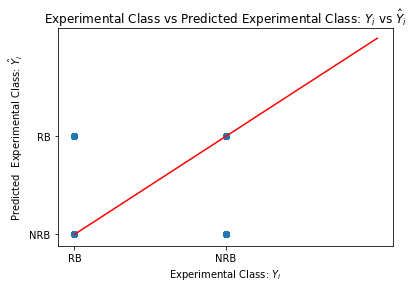

In [137]:
plt.scatter(y_test, y_predTest3)
plt.xlabel('Experimental Class: $Y_i$')
plt.ylabel('Predicted  Experimental Class: $\hat{Y}_i$')
plt.title('Experimental Class vs Predicted Experimental Class: $Y_i$ vs $\hat{Y}_i$')

# plot a line, a perfect prediction would all fall on this line
x = np.linspace(0, 2)
y = x
plt.plot(x, y, 'r')
print("\n------------------------Gaussian Kernel-----------------------")

#### To evaluate our algorithm, we use accuracy_score, confusion_matrix and classification_report to obtain the values of the respective metrics. The classification_report lists precision score, recall score and f1-score for both classes, macro average and weighted average.

##### Testing Data


In [103]:
print("Testing Data\n---------------")
print("Accuracy Score: ", accuracy_score(y_test, y_predTest3))

print("\nConfusion Matrix:\n ", confusion_matrix(y_test, y_predTest3))

print("\n\nClassification Report:\n")
print(classification_report(y_test, y_predTest3))


Testing Data
---------------
Accuracy Score:  0.8056872037914692

Confusion Matrix:
  [[132  20]
 [ 21  38]]


Classification Report:

              precision    recall  f1-score   support

         NRB       0.86      0.87      0.87       152
          RB       0.66      0.64      0.65        59

    accuracy                           0.81       211
   macro avg       0.76      0.76      0.76       211
weighted avg       0.80      0.81      0.81       211



##### Training Data

In [104]:
print("Training Data\n---------------")
print("Accuracy Score: ", accuracy_score(y_train, y_predTrain3))

print("\nConfusion Matrix:\n ", confusion_matrix(y_train, y_predTrain3))

print("\n\nClassification Report:\n")
print(classification_report(y_train, y_predTrain3))


Training Data
---------------
Accuracy Score:  0.806872037914692

Confusion Matrix:
  [[501  46]
 [117 180]]


Classification Report:

              precision    recall  f1-score   support

         NRB       0.81      0.92      0.86       547
          RB       0.80      0.61      0.69       297

    accuracy                           0.81       844
   macro avg       0.80      0.76      0.77       844
weighted avg       0.81      0.81      0.80       844



### 4. Sigmoid Kernel

#### We take kernel type _sigmoid_ as the parameter for SVC class.
#### For the final time, the _fit_ method from the _SVC_ class takes the training data as argument to train SVM algorithm.

In [105]:
svc4 = SVC(kernel='sigmoid')
svc4.fit(X_train, y_train)

SVC(kernel='sigmoid')

#### We use the predict method from the SVC class for predictions with the test and train data as the parameters.

In [106]:
y_predTest4 = svc4.predict(X_test)
y_predTrain4 = svc4.predict(X_train)

#### A graph of experimental class against predicted experimental class is plotted.


------------------------Sigmoid Kernel-----------------------


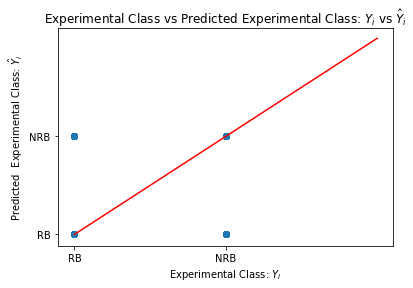

In [138]:
plt.scatter(y_test, y_predTest4)
plt.xlabel('Experimental Class: $Y_i$')
plt.ylabel('Predicted  Experimental Class: $\hat{Y}_i$')
plt.title('Experimental Class vs Predicted Experimental Class: $Y_i$ vs $\hat{Y}_i$')

# plot a line, a perfect prediction would all fall on this line
x = np.linspace(0, 2)
y = x
plt.plot(x, y, 'r')
print("\n------------------------Sigmoid Kernel-----------------------")

#### To evaluate our algorithm, we use accuracy_score, confusion_matrix and classification_report to obtain the values of the respective metrics. The classification_report lists precision score, recall score and f1-score for both classes, macro average and weighted average.

##### Testing Data

In [109]:
print("Testing Data\n---------------")
print("Accuracy Score: ", accuracy_score(y_test, y_predTest4))

print("\nConfusion Matrix:\n ", confusion_matrix(y_test, y_predTest4))

print("\n\nClassification Report:\n")
print(classification_report(y_test, y_predTest4))

Testing Data
---------------
Accuracy Score:  0.5260663507109005

Confusion Matrix:
  [[101  51]
 [ 49  10]]


Classification Report:

              precision    recall  f1-score   support

         NRB       0.67      0.66      0.67       152
          RB       0.16      0.17      0.17        59

    accuracy                           0.53       211
   macro avg       0.42      0.42      0.42       211
weighted avg       0.53      0.53      0.53       211



##### Training Data

In [110]:
print("Training Data\n---------------")
print("Accuracy Score: ", accuracy_score(y_train, y_predTrain4))

print("\nConfusion Matrix:\n ", confusion_matrix(y_train, y_predTrain4))

print("\n\nClassification Report:\n")
print(classification_report(y_train, y_predTrain4))

Training Data
---------------
Accuracy Score:  0.4976303317535545

Confusion Matrix:
  [[361 186]
 [238  59]]


Classification Report:

              precision    recall  f1-score   support

         NRB       0.60      0.66      0.63       547
          RB       0.24      0.20      0.22       297

    accuracy                           0.50       844
   macro avg       0.42      0.43      0.42       844
weighted avg       0.48      0.50      0.48       844



#### Graphs of the data models of different kernals against recall score, precision score, F1 score and accuracy are plotted. Recall score, precision score and F1 score are plotted for both macro average and weighted average.

In [111]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
kernal = ['Linear','Polynomial','Gaussian','Sigmoid']

##### Accuracy Score

Testing Data


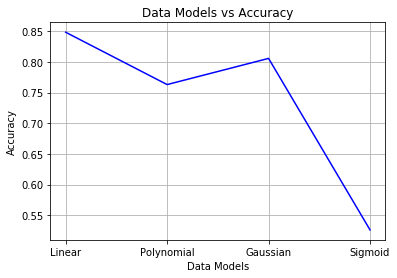

Training Data


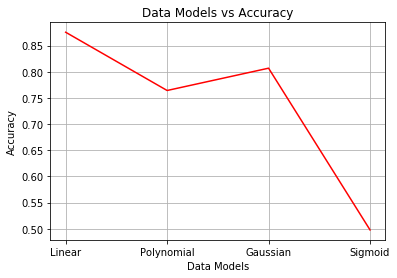

In [112]:
T_accuracy = [accuracy_score(y_test, y_predTest1),
           accuracy_score(y_test, y_predTest2),
           accuracy_score(y_test, y_predTest3),
           accuracy_score(y_test, y_predTest4)]

Tr_accuracy = [accuracy_score(y_train, y_predTrain1),
           accuracy_score(y_train, y_predTrain2),
           accuracy_score(y_train, y_predTrain3),
           accuracy_score(y_train, y_predTrain4)]


print("Testing Data")
a = plt.plot(kernal, T_accuracy, color = 'blue')
plt.title('Data Models vs Accuracy')
plt.xlabel('Data Models')
plt.ylabel('Accuracy')
plt.grid()
plt.show(a)

print("Training Data")
b = plt.plot(kernal, Tr_accuracy, color = 'red')
plt.title('Data Models vs Accuracy')
plt.xlabel('Data Models')
plt.ylabel('Accuracy')
plt.grid()
plt.show(b)

##### Recall Macro Average

Testing Data


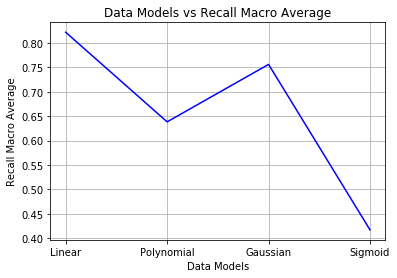

Training Data


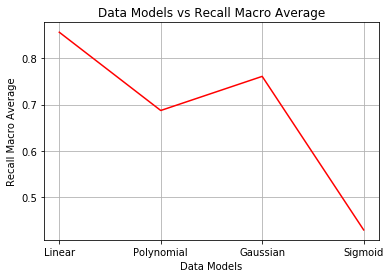

In [113]:
T_recMac = [recall_score(y_test, y_predTest1, average= 'macro'),
                recall_score(y_test, y_predTest2, average= 'macro'),
                recall_score(y_test, y_predTest3, average= 'macro'),
                recall_score(y_test, y_predTest4, average= 'macro')]

Tr_recMac = [recall_score(y_train, y_predTrain1, average= 'macro'),
            recall_score(y_train, y_predTrain2, average= 'macro'),
            recall_score(y_train, y_predTrain3, average= 'macro'),
            recall_score(y_train, y_predTrain4, average= 'macro')]

print("Testing Data")
c = plt.plot(kernal, T_recMac, color = 'blue')
plt.title('Data Models vs Recall Macro Average')
plt.xlabel('Data Models')
plt.ylabel('Recall Macro Average')
plt.grid()
plt.show(c)

print("Training Data")
d = plt.plot(kernal, Tr_recMac, color = 'red')
plt.title('Data Models vs Recall Macro Average')
plt.xlabel('Data Models')
plt.ylabel('Recall Macro Average')
plt.grid()
plt.show(d)

##### Recall Weighted Average

Testing Data


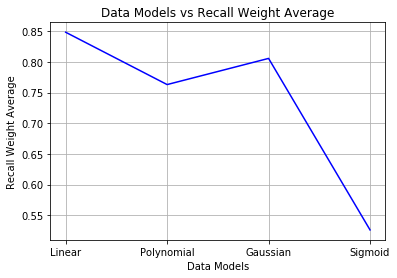

Training Data


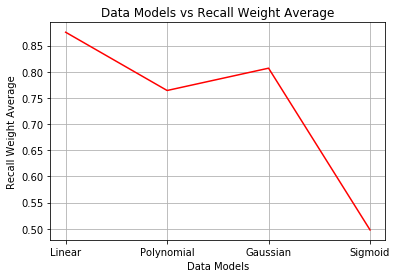

In [114]:
T_recWei = [recall_score(y_test, y_predTest1, average= 'weighted'),
                recall_score(y_test, y_predTest2, average= 'weighted'),
                recall_score(y_test, y_predTest3, average= 'weighted'),
                recall_score(y_test, y_predTest4, average= 'weighted')]

Tr_recWei = [recall_score(y_train, y_predTrain1, average= 'weighted'),
            recall_score(y_train, y_predTrain2, average= 'weighted'),
            recall_score(y_train, y_predTrain3, average= 'weighted'),
            recall_score(y_train, y_predTrain4, average= 'weighted')]


print("Testing Data")
e = plt.plot(kernal, T_recWei, color = 'blue')
plt.title('Data Models vs Recall Weight Average')
plt.xlabel('Data Models')
plt.ylabel('Recall Weight Average')
plt.grid()
plt.show(e)

print("Training Data")
f = plt.plot(kernal, Tr_recWei, color = 'red')
plt.title('Data Models vs Recall Weight Average')
plt.xlabel('Data Models')
plt.ylabel('Recall Weight Average')
plt.grid()
plt.show(f)

##### Precision Macro Average

Testing Data


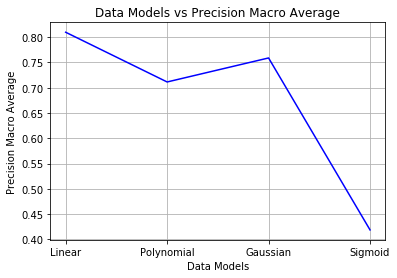

Training Data


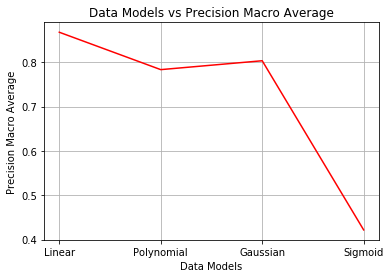

In [115]:
T_precMac = [precision_score(y_test, y_predTest1, average= 'macro'),
                precision_score(y_test, y_predTest2, average= 'macro'),
                precision_score(y_test, y_predTest3, average= 'macro'),
                precision_score(y_test, y_predTest4, average= 'macro')]

Tr_precMac = [precision_score(y_train, y_predTrain1, average= 'macro'),
            precision_score(y_train, y_predTrain2, average= 'macro'),
            precision_score(y_train, y_predTrain3, average= 'macro'),
            precision_score(y_train, y_predTrain4, average= 'macro')]

print("Testing Data")
g = plt.plot(kernal, T_precMac, color = 'blue')
plt.title('Data Models vs Precision Macro Average')
plt.xlabel('Data Models')
plt.ylabel('Precision Macro Average')
plt.grid()
plt.show(g)

print("Training Data")
h = plt.plot(kernal, Tr_precMac, color = 'red')
plt.title('Data Models vs Precision Macro Average')
plt.xlabel('Data Models')
plt.ylabel('Precision Macro Average')
plt.grid()
plt.show(h)

##### Precision Weighted Average

Testing Data


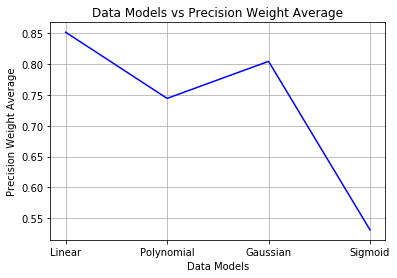

Training Data


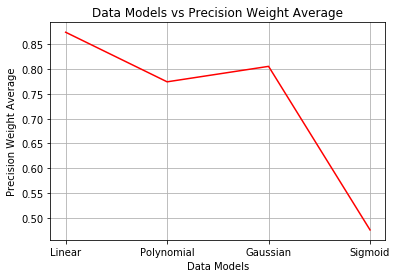

In [116]:
T_precWei = [precision_score(y_test, y_predTest1, average= 'weighted'),
                precision_score(y_test, y_predTest2, average= 'weighted'),
                precision_score(y_test, y_predTest3, average= 'weighted'),
                precision_score(y_test, y_predTest4, average= 'weighted')]

Tr_precWei = [precision_score(y_train, y_predTrain1, average= 'weighted'),
            precision_score(y_train, y_predTrain2, average= 'weighted'),
            precision_score(y_train, y_predTrain3, average= 'weighted'),
            precision_score(y_train, y_predTrain4, average= 'weighted')]

print("Testing Data")
i = plt.plot(kernal, T_precWei, color = 'blue')
plt.title('Data Models vs Precision Weight Average')
plt.xlabel('Data Models')
plt.ylabel('Precision Weight Average')
plt.grid()
plt.show(i)

print("Training Data")
j = plt.plot(kernal, Tr_precWei, color = 'red')
plt.title('Data Models vs Precision Weight Average')
plt.xlabel('Data Models')
plt.ylabel('Precision Weight Average')
plt.grid()
plt.show(j)

##### F1 Macro Average

Testing Data


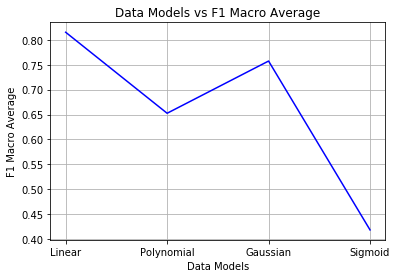

Training Data


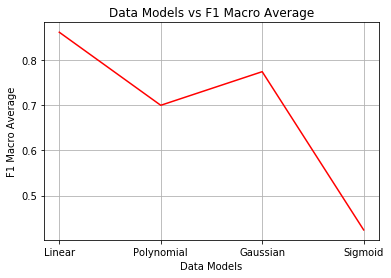

In [117]:
T_f1Mac = [f1_score(y_test, y_predTest1, average= 'macro'),
        f1_score(y_test, y_predTest2, average= 'macro'),
        f1_score(y_test, y_predTest3, average= 'macro'),
        f1_score(y_test, y_predTest4, average= 'macro')]

Tr_f1Mac = [f1_score(y_train, y_predTrain1, average= 'macro'),
            f1_score(y_train, y_predTrain2, average= 'macro'),
            f1_score(y_train, y_predTrain3, average= 'macro'),
            f1_score(y_train, y_predTrain4, average= 'macro')]

print("Testing Data")
k = plt.plot(kernal, T_f1Mac, color = 'blue')
plt.title('Data Models vs F1 Macro Average')
plt.xlabel('Data Models')
plt.ylabel('F1 Macro Average')
plt.grid()
plt.show(k)

print("Training Data")
l = plt.plot(kernal, Tr_f1Mac, color = 'red')
plt.title('Data Models vs F1 Macro Average')
plt.xlabel('Data Models')
plt.ylabel('F1 Macro Average')
plt.grid()
plt.show(l)

##### F1 Weighted Average

Testing Data


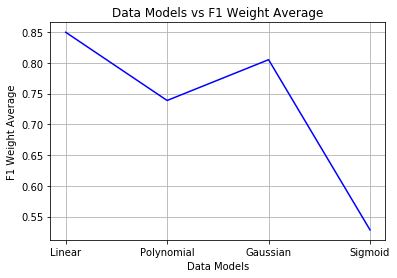

Training Data


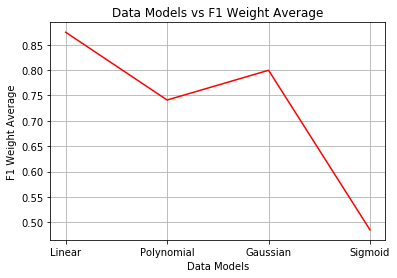

In [118]:
T_f1Wei = [f1_score(y_test, y_predTest1, average= 'weighted'),
            f1_score(y_test, y_predTest2, average= 'weighted'),
            f1_score(y_test, y_predTest3, average= 'weighted'),
            f1_score(y_test, y_predTest4, average= 'weighted')]

Tr_f1Mac = [f1_score(y_train, y_predTrain1, average= 'weighted'),
            f1_score(y_train, y_predTrain2, average= 'weighted'),
            f1_score(y_train, y_predTrain3, average= 'weighted'),
            f1_score(y_train, y_predTrain4, average= 'weighted')]

print("Testing Data")
m = plt.plot(kernal, T_f1Wei, color = 'blue')
plt.title('Data Models vs F1 Weight Average')
plt.xlabel('Data Models')
plt.ylabel('F1 Weight Average')
plt.grid()
plt.show(m)

print("Training Data")
n = plt.plot(kernal, Tr_f1Mac, color = 'red')
plt.title('Data Models vs F1 Weight Average')
plt.xlabel('Data Models')
plt.ylabel('F1 Weight Average')
plt.grid()
plt.show(n)

## Fuzzy Logic Model Using Python

#### Importing the required modules

In [119]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import statistics as st

### Determine the maximum and minimum values for the columns we chose from three of the features previously identified from feature selection: SpMax_L, nHM and C% as well as for experimental_class(our target variable).

In [122]:
#SpMax_L
x1min = min(biodeg.SpMax_L)
print('SpMax_L Minimum', x1min)
x1max = max(biodeg.SpMax_L)
print('SpMax_L Maximum', x1max)
x1mid = st.median(biodeg.SpMax_L)
print(x1mid)

#nHM
x2min = min(biodeg.nHM)
print('nhM Minimum', x2min)
x2max = max(biodeg.nHM)
print('nhM Maximum', x2max)
x2mid = st.median(biodeg.nHM)
print(x2mid)

#C%
x3= biodeg['C%']
x3min = min(x3)
print('C% Minimum', x3min)
x3max = max(x3)
print('C% Maximum', x3max)
x3mid = st.median(x3)
print(x3mid)

#experimental_class
ymin = min(biodeg.experimental_class)
print(ymin)
ymax = max(biodeg.experimental_class)
print(ymax)
y=biodeg.experimental_class
print(y)


SpMax_L Minimum 2.0
SpMax_L Maximum 6.496
4.828
nhM Minimum 0
nhM Maximum 12
0
C% Minimum 0.0
C% Maximum 60.7
37.5
NRB
RB
0        RB
1        RB
2        RB
3        RB
4        RB
       ... 
1050    NRB
1051    NRB
1052    NRB
1053    NRB
1054    NRB
Name: experimental_class, Length: 1055, dtype: object


### Creating the membership functions for input variables and target variable, and visualise them in graph format

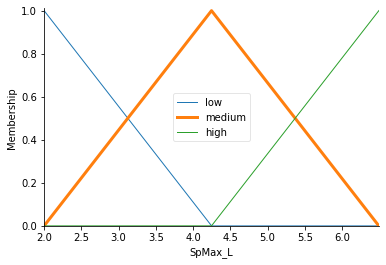

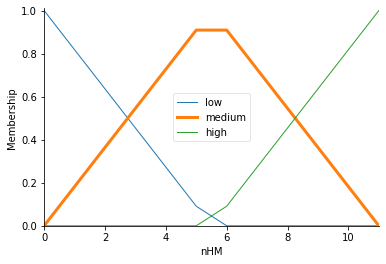

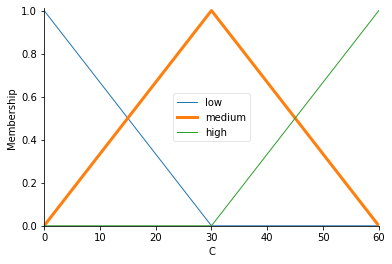

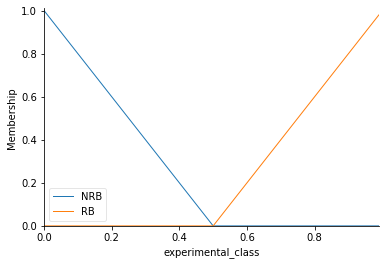

In [123]:
# Antecedent objects hold universe variables and membership function for input variables
SpMax_L = ctrl.Antecedent(np.arange(x1min, x1max, 0.001), 'SpMax_L')
nHM = ctrl.Antecedent(np.arange(x2min, x2max, 1), 'nHM')
C = ctrl.Antecedent(np.arange(x3min, x3max, 1), 'C')
# Consequent object holds the universe variable and member ship function for target variable
experimental_class = ctrl.Consequent(np.arange(0, 1, 0.01), 'experimental_class')

# Automatic membership function, using automf(3, 5, or 7), with labels low medium and high for numeric input columns
names = ['low', 'medium', 'high']
SpMax_L.automf(names=names)
nHM.automf(names=names)
C.automf(names=names)

# Custom membership functions using triangular membership function, trimf() using Python API
# Labels are 'NRB' and 'RB' but have to be determined using numeric values between 0 and 1
experimental_class['NRB'] = fuzz.trimf(experimental_class.universe, [0, 0, 0.5])
experimental_class['RB'] = fuzz.trimf(experimental_class.universe, [0.5, 1, 1])

# View() to graphically visualise how the membership functions look
SpMax_L['medium'].view()

nHM['medium'].view()

C['medium'].view()

experimental_class.view()

# Fuzzy Rules
### (We create fuzzy relations between the input variables and target variable)

### Rule 1: If SpMax_L is high, then experimental_class will be not ready biodegradable (NRB)
### Rule 2: If SpMax_L is medium AND C% is medium OR C% is high, then experimental_class will be ready biodegradable (RB)
### Rule 3: If SpMax_L is low, then experimental_class will be ready biodegradable (RB)
### Rule 4: If SpMax_L is medium AND nHM is low, then experimental_class will be ready biodegradable (RB)

In [124]:
rule1 = ctrl.Rule(SpMax_L['high'], experimental_class['NRB'])
rule2 = ctrl.Rule(SpMax_L['medium'] & C['medium'] | C['high'], experimental_class['RB'])
rule3 = ctrl.Rule(SpMax_L['low'], experimental_class['RB'])
rule4 = ctrl.Rule(SpMax_L['medium'] & nHM['low'], experimental_class['RB'])

Rule 1


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2c112047b08>)

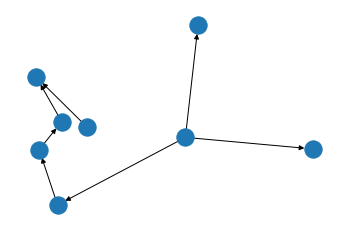

In [125]:
print('Rule 1')
rule1.view()

Rule 2


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2c1120c7448>)

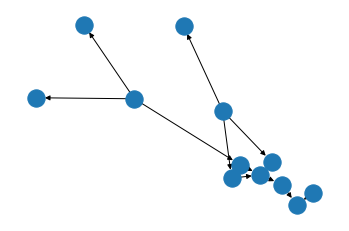

In [126]:
print('Rule 2')
rule2.view()

Rule 3


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2c112127ec8>)

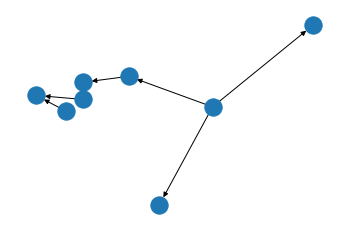

In [127]:
print('Rule 3')
rule3.view()

Rule 4


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2c11218c408>)

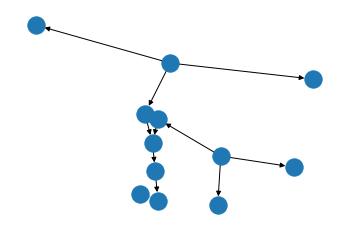

In [128]:
print('Rule 4')
rule4.view()

### Creating our control system using the control module from skfuzzy
### Creating our controller qsar using ControlSystemSimulation object
### Then adding input variable values and computing the simulation

0.8242684425889997


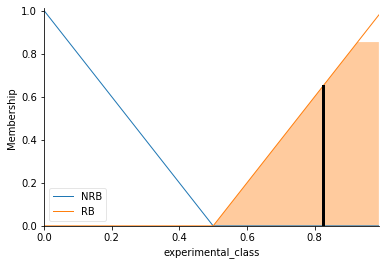

In [129]:
#control system
qsar_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])   

#controller
qsar = ctrl.ControlSystemSimulation(qsar_ctrl)

#add input
qsar.input['SpMax_L'] = 3.919
qsar.input['nHM'] = 0
qsar.input['C'] = 31.4

# Crunch the input
qsar.compute()

#visualise
print (qsar.output['experimental_class'])
experimental_class.view(sim=qsar)